In [1]:
import sys
sys.path.insert(1,'/Users/simon/GPlatesBuilds/pygplates_rev28_python36_MacOS64/')
#sys.path.append('/Users/simon/GIT/GPlatesReconstructionModel/gprm/')
#sys.path.append('/Users/simon/GIT/GPlatesReconstructionModel/gprm/utils/')

import pygplates
import pygmt

from gprm import ReconstructionModel

print(pygplates.__version__)

%load_ext autoreload
%autoreload 2

Failed to load plotting dependencies
2.2.0.28


In [7]:
M2016 = ReconstructionModel('Matthews++2016')
M2016.add_rotation_model('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/Rotations/Matthews_etal_GPC_2016_410-0Ma_GK07.rot')
M2016.add_continent_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/ContinentalPolygons/Matthews_etal_GPC_2016_ContinentalPolygons.gpmlz')
M2016.add_dynamic_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_MesozoicCenozoic_PlateTopologies.gpmlz')
M2016.add_dynamic_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_Paleozoic_PlateTopologies.gpmlz')
M2016.add_dynamic_polygons('/Applications/GPlates-2.0.0/SampleData/FeatureCollections/DynamicPolygons/Matthews_etal_GPC_2016_TopologyBuildingBlocks.gpmlz')


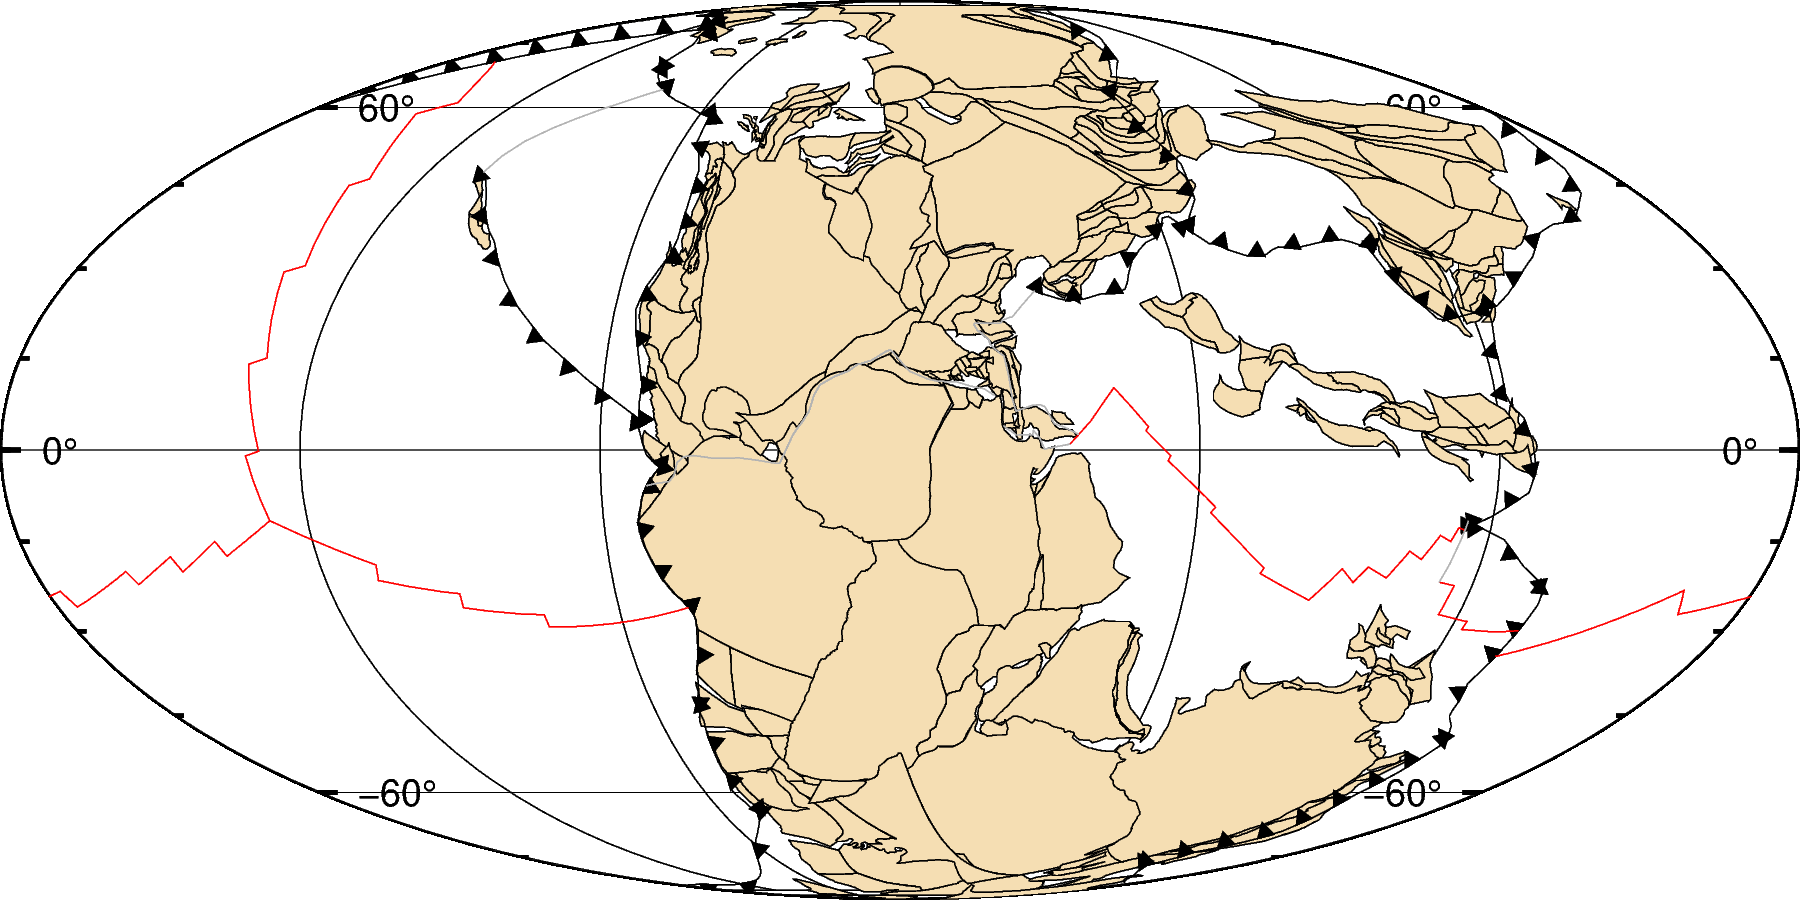

In [8]:
reconstruction_time = 220.
reconstructed_continents = M2016.polygon_snapshot('continents', reconstruction_time)
reconstructed_plates = M2016.plate_snapshot(reconstruction_time)


fig = pygmt.Figure()
fig.basemap(region='d', projection='W6i', frame='afg')
reconstructed_continents.plot(fig, fill_color='wheat')
reconstructed_plates.plot_subduction_zones(fig)
reconstructed_plates.plot_mid_ocean_ridges(fig)
reconstructed_plates.plot_other_boundaries(fig)
fig.show(width=800)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

cmap = plt.cm.magma

min_time = 0.
max_time = 200.
time_step = 10.

def plot_subduction_stack(reconstruction_model, 
                          min_time, max_time, time_step,
                          scale_min_time=None, scale_max_time=None):
    
    if scale_min_time is None:
        scale_min_time = min_time
    if scale_max_time is None:
        scale_max_time = max_time
        
    fig = pygmt.Figure()
    fig.basemap(region='g', projection='W6i', frame='afg')
    fig.coast(land='lightgray')

    time_list = np.arange(max_time,min_time-time_step,-time_step)
    color_indices = np.linspace((min_time-scale_min_time)/(scale_max_time-scale_min_time),
                                (max_time-scale_min_time)/(scale_max_time-scale_min_time),
                                time_list.shape[0])
        
    for i,reconstruction_time in enumerate(time_list):
        #print(reconstruction_time)
        idx = color_indices[i]
        colors = cmap(1-idx)
        colors = np.array(colors)*255.

        s = reconstruction_model.plate_snapshot(reconstruction_time)
        sz = s.get_boundary_features(['subduction'])

        for szz in sz:
            if szz.get_geometry() is not None:
                data = szz.get_geometry().to_lat_lon_array()
                if szz.get_enumeration(pygplates.PropertyName.gpml_subduction_polarity)=='Left':
                    fig.plot(x=data[:,1],y=data[:,0], style="f10p/4p+l+t", 
                             pen='{:f}/{:f}/{:f}'.format(colors[0],colors[1],colors[2]),
                             color='{:f}/{:f}/{:f}'.format(colors[0],colors[1],colors[2]))
                elif szz.get_enumeration(pygplates.PropertyName.gpml_subduction_polarity)=='Right':
                    fig.plot(x=data[:,1],y=data[:,0], style="f10p/4p+r+t",
                             pen='{:f}/{:f}/{:f}'.format(colors[0],colors[1],colors[2]),
                             color='{:f}/{:f}/{:f}'.format(colors[0],colors[1],colors[2]))

    fig.basemap(region='g', projection='W6i', frame='afg')
    #fig.show(width=800)
    return fig
    

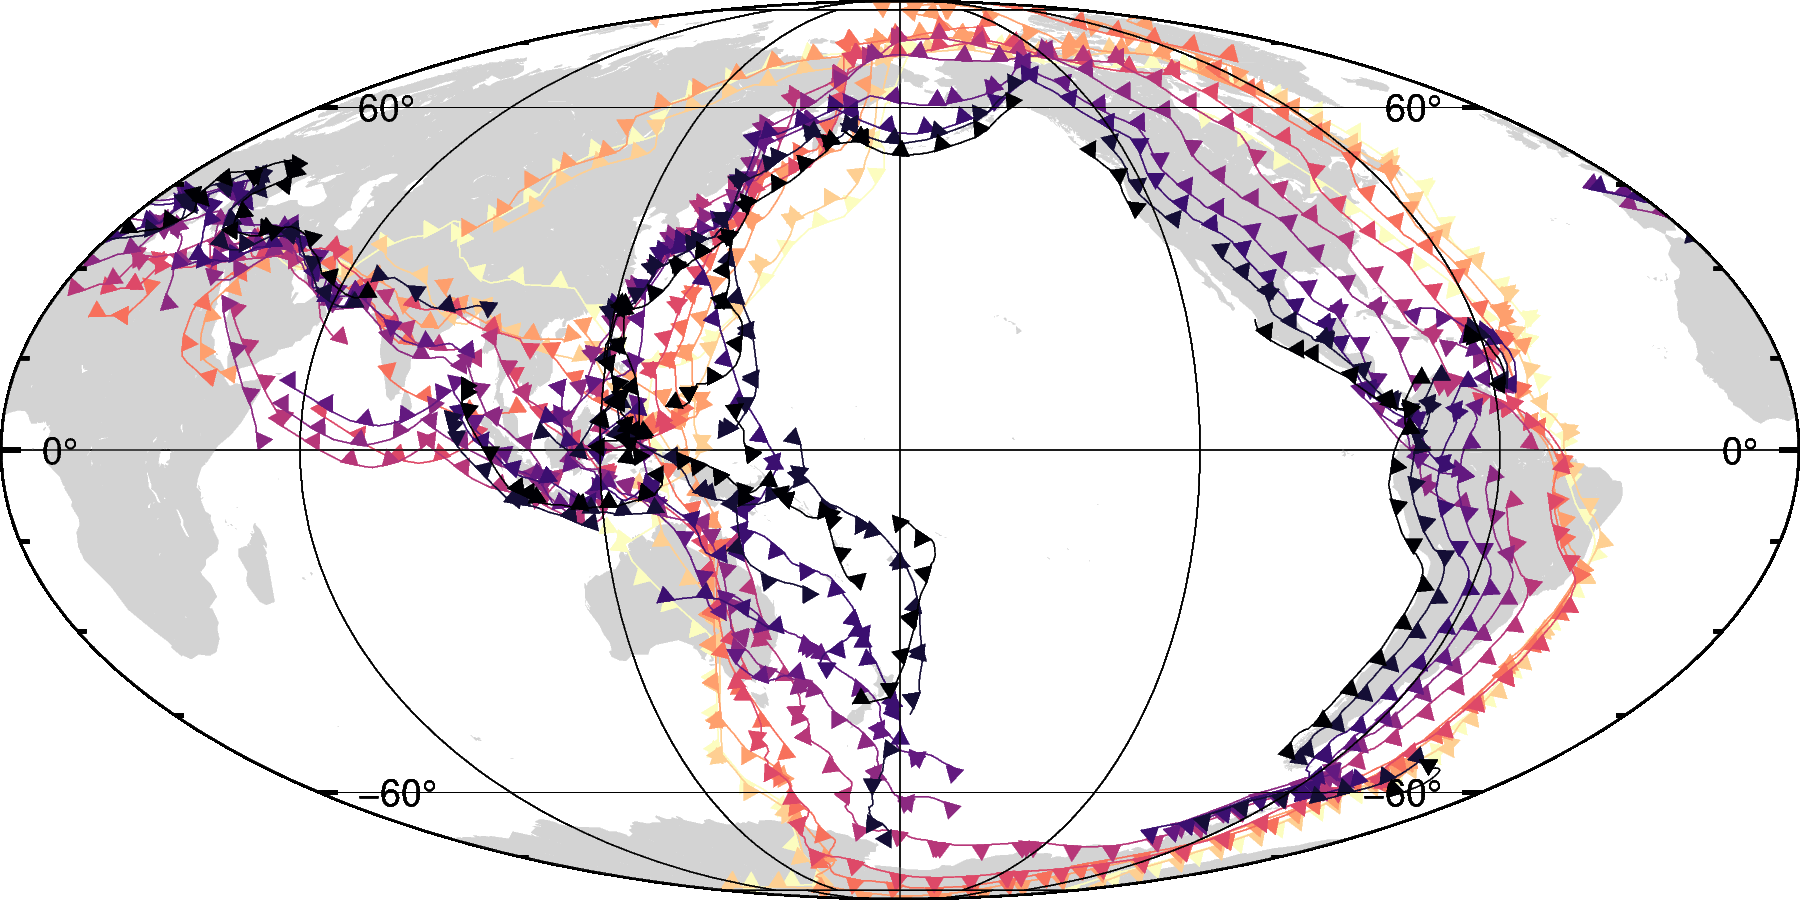

In [12]:
fig = plot_subduction_stack(M2016, 0., 200., 20.)
fig.show(width=800)